<a href="https://colab.research.google.com/github/Imran012x/Hilsha_CoLab/blob/main/1_CNN%2Btransfer_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Co-Lab -->> Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# from google.colab import files

# # Upload a file
# uploaded = files.upload()

# # Get the file name
# file_name = list(uploaded.keys())[0]
# print(f"Uploaded file: {file_name}")


#Data Preprocessing

In [3]:
import zipfile
import os

with zipfile.ZipFile('/content/drive/MyDrive/data_fish_224_12k.zip', 'r') as zip_ref:
    zip_ref.extractall('')

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [5]:
ilish_pic= os.listdir('/content/ilish/')
print(ilish_pic[0:5])
print(ilish_pic[-5:])
chandana_pic= os.listdir('/content/chandana/')
sardin_pic= os.listdir('/content/sardin/')
sardinella_pic= os.listdir('/content/sardinella/')
punctatus_pic= os.listdir('/content/punctatus/')

['977.webp', '327.webp', '1246.webp', '2809.webp', '2231.webp']
['1294.webp', '875.webp', '2973.webp', '1250.webp', '487.webp']


In [6]:
print('ilish   images:', len(ilish_pic))
print('chandana  images:', len(chandana_pic))
print('sardin   images:', len(sardin_pic))
print('sardinella  images:', len(sardinella_pic))
print('punctatus images:', len(sardinella_pic))

ilish   images: 3000
chandana  images: 2000
sardin   images: 3000
sardinella  images: 2000
punctatus images: 2000


In [7]:
ilish_pic_labels = [0]*len(ilish_pic)
chandana_pic_labels = [1]*len(chandana_pic)
sardin_pic_labels = [2]*len(sardin_pic)
sardinella_pic_labels = [3]*len(sardinella_pic)
punctatus_pic_labels = [4]*len(punctatus_pic)


print(ilish_pic_labels[0:5])

print(chandana_pic_labels[0:5])

print(sardin_pic_labels[0:5])

print(sardinella_pic_labels[0:5])

print(punctatus_pic_labels[0:5])

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]
[2, 2, 2, 2, 2]
[3, 3, 3, 3, 3]
[4, 4, 4, 4, 4]


In [8]:
labels = ilish_pic_labels + chandana_pic_labels + sardin_pic_labels + sardinella_pic_labels + punctatus_pic_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

12000
[0, 0, 0, 0, 0]
[4, 4, 4, 4, 4]


In [9]:
import random
import os
from PIL import Image
import numpy as np

# Parameters (set different numbers for each class)
ilish_image_number = len(ilish_pic)
chandana_image_number = len(chandana_pic)
sardin_image_number = len(sardin_pic)
sardinella_image_number = len(sardinella_pic)
punctatus_image_number = len(punctatus_pic)


# Initialize the list to store the images
data = []

def process_images(image_path, image_number):
    image_labels = sorted(os.listdir(image_path))  # Ensure images are in order
    random.shuffle(image_labels)  # Shuffle to get random ones
    selected_images = []
    for img_file in image_labels[:image_number]:
        image = Image.open(os.path.join(image_path, img_file))
        image = image.resize((224, 224))
        image = image.convert('RGB')
        image = np.array(image)
        selected_images.append(image)
    return selected_images

# Process images for each category
data.extend(process_images('/content/ilish/', ilish_image_number))
data.extend(process_images('/content/chandana/', chandana_image_number))
data.extend(process_images('/content/sardin/', sardin_image_number))
data.extend(process_images('/content/sardinella/', sardinella_image_number))
data.extend(process_images('/content/punctatus/', punctatus_image_number))

In [10]:
# Convert labels to numpy array for easy processing
labels = np.array(labels)

# Count the number of images in each class
unique, counts = np.unique(labels, return_counts=True)

# Print the number of images for each class
class_counts = dict(zip(unique, counts))
print(f"Class counts: {class_counts}")
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)
print(X.shape)
print(Y.shape)

Class counts: {0: 3000, 1: 2000, 2: 3000, 3: 2000, 4: 2000}
(12000, 224, 224, 3)
(12000,)


(12000, 224, 224, 3) (9600, 224, 224, 3) (2400, 224, 224, 3)


array([[[122, 126, 103],
        [123, 126, 106],
        [123, 127, 110],
        ...,
        [ 58,  76,  18],
        [ 60,  78,  20],
        [ 62,  80,  24]],

       [[123, 126, 105],
        [123, 126, 106],
        [121, 125, 106],
        ...,
        [ 57,  75,  16],
        [ 58,  76,  18],
        [ 61,  80,  22]],

       [[123, 126, 106],
        [122, 125, 105],
        [119, 123, 104],
        ...,
        [ 56,  75,  14],
        [ 57,  76,  17],
        [ 60,  79,  19]],

       ...,

       [[ 98, 100,  91],
        [ 99, 101,  89],
        [100, 103,  88],
        ...,
        [ 52,  60,  37],
        [ 54,  63,  36],
        [ 63,  71,  49]],

       [[ 98, 100,  91],
        [ 97,  98,  87],
        [ 97,  99,  85],
        ...,
        [ 53,  61,  37],
        [ 57,  65,  41],
        [ 77,  84,  67]],

       [[101, 102,  94],
        [101, 103,  93],
        [ 99, 101,  88],
        ...,
        [ 56,  64,  42],
        [ 63,  71,  51],
        [ 91,  97,  87]]], dtype=uint8)
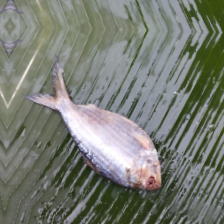

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

X_train[0]

#Optuna-Hyper parameter Training

In [12]:
# !pip install optuna
# import optuna
# import numpy as np
# import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
# from tensorflow.keras.optimizers import RMSprop
# from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, accuracy_score, f1_score
# import seaborn as sns

# # Define model creation function
# def create_model(learning_rate, num_filters, kernel_size):
#     input_shape = (224, 224, 3)
#     base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

#     x = base_model.output
#     x = Conv2D(num_filters, (kernel_size, kernel_size), activation='relu', padding='same')(x)
#     x = MaxPooling2D((2, 2))(x)
#     x = Conv2D(num_filters * 2, (kernel_size, kernel_size), activation='relu', padding='same')(x)
#     x = MaxPooling2D((2, 2))(x)
#     x = GlobalAveragePooling2D()(x)
#     x = Dense(256, activation='relu')(x)
#     output = Dense(4, activation='softmax')(x)

#     model = Model(inputs=base_model.input, outputs=output)

#     for layer in base_model.layers:
#         layer.trainable = False

#     model.compile(optimizer=RMSprop(learning_rate=learning_rate),
#                   loss='sparse_categorical_crossentropy',
#                   metrics=['accuracy'])
#     return model

# # Define Optuna objective function
# def objective(trial):
#     learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
#     num_filters = trial.suggest_int('num_filters', 16, 128)
#     kernel_size = trial.suggest_categorical('kernel_size', [3, 7])

#     model = create_model(learning_rate, num_filters, kernel_size)
#     model.fit(X_train_scaled, Y_train, epochs=8, validation_data=(X_test_scaled, Y_test), verbose=0)
#     score = model.evaluate(X_test_scaled, Y_test, verbose=0)
#     return score[1]

# # Run Optuna study
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=30)

# # Get best parameters
# best_params = study.best_params
# print("Best hyperparameters: ", best_params)

# # Train final model with best parameters
# model = create_model(best_params['learning_rate'], best_params['num_filters'], best_params['kernel_size'])
# history = model.fit(X_train_scaled, Y_train,
#                     validation_split=0.2,
#                     epochs=10, batch_size=32, verbose=1)

# # Evaluate model
# val_loss, val_accuracy = model.evaluate(X_test_scaled, Y_test, verbose=0)
# print(f"Validation Accuracy: {val_accuracy:.4f}")


#Unsupervised Learning

In [13]:
# import numpy as np
# import tensorflow as tf
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import zipfile
# import os
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.preprocessing.image import load_img, img_to_array
# from sklearn.cluster import KMeans
# from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.applications.resnet50 import preprocess_input

# # Set Random Seed for Reproducibility
# np.random.seed(42)
# tf.random.set_seed(42)

# # 📌 Extract the ZIP File
# zip_file = "/content/drive/MyDrive/mixed.zip"  # Update this path
# extract_folder = "butterfly_dataset"

# if not os.path.exists(extract_folder):
#     with zipfile.ZipFile(zip_file, 'r') as zip_ref:
#         zip_ref.extractall(extract_folder)

# # 📌 Generate Labels from Filenames
# image_folder = "butterfly_dataset/mixed"  # Path where images are stored

# # Get all image filenames
# image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.webp'))]



# # Load images and preprocess them for feature extraction
# img_size = (224, 224)
# images = []
# for img_file in image_files:
#     img_path = os.path.join(image_folder, img_file)
#     img = load_img(img_path, target_size=img_size)
#     img_array = img_to_array(img)  # Convert image to array
#     img_array = preprocess_input(img_array)  # Apply ResNet preprocessing
#     images.append(img_array)

# # Convert list of images into a numpy array
# images = np.array(images)

# # Ensure the shape is correct (num_images, height, width, channels)
# print(f"Image shape: {images.shape}")

# # 📌 Use Pre-trained ResNet50 for Feature Extraction
# resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# resnet_model.trainable = False  # Freeze the layers

# # Extract features from the images
# features = resnet_model.predict(np.array(images), batch_size=32)

# # Flatten the features for clustering
# features_flat = features.reshape(features.shape[0], -1)



# # 📌 Apply KMeans Clustering to Group Images into Clusters (Pseudo-Labels)
# num_clusters = 4  # Set the number of clusters (adjust as needed)
# kmeans = KMeans(n_clusters=num_clusters, random_state=42)
# pseudo_labels = kmeans.fit_predict(features_flat)

# # 📌 Create a DataFrame with the pseudo-labels
# df = pd.DataFrame({'filename': image_files, 'label': pseudo_labels})

# # Split into train and validation sets (80% train, 20% validation)
# from sklearn.model_selection import train_test_split
# train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

# # 📌 Image Data Augmentation
# datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True
# )

# # 📌 Load Data from DataFrame (Single Folder)
# batch_size = 32

# train_df["label"] = train_df["label"].astype(str)
# val_df["label"] = val_df["label"].astype(str)

# train_generator = datagen.flow_from_dataframe(
#     train_df,
#     directory=image_folder,
#     x_col="filename",
#     y_col="label",
#     target_size=img_size,
#     batch_size=batch_size,
#     class_mode='categorical'
# )

# val_generator = datagen.flow_from_dataframe(
#     val_df,
#     directory=image_folder,
#     x_col="filename",
#     y_col="label",
#     target_size=img_size,
#     batch_size=batch_size,
#     class_mode='categorical'
# )

# # 📌 CNN Model Definition
# model = Sequential([
#     Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(224, 224, 3)),
#     BatchNormalization(),
#     MaxPooling2D((2,2)),

#     Conv2D(64, (3,3), activation='relu', padding='same'),
#     BatchNormalization(),
#     MaxPooling2D((2,2)),

#     Conv2D(128, (3,3), activation='relu', padding='same'),
#     BatchNormalization(),
#     MaxPooling2D((2,2)),

#     Flatten(),
#     Dense(256, activation='relu'),
#     Dropout(0.3),
#     Dense(num_clusters, activation='softmax')  # Number of clusters as output classes
# ])

# # 📌 Compile the Model
# model.compile(optimizer=Adam(learning_rate=0.0005),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # 📌 Train the Model
# history = model.fit(train_generator,
#                     validation_data=val_generator,
#                     epochs=100, batch_size=batch_size, verbose=1)

# # 📌 Evaluate the Model
# val_loss, val_accuracy = model.evaluate(val_generator, verbose=0)
# print(f"Validation Accuracy: {val_accuracy:.4f}, Validation Loss: {val_loss:.4f}")

# # 📌 Plot Training vs Validation Accuracy/Loss
# plt.figure(figsize=(12,5))
# plt.subplot(1,2,1)
# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.legend()
# plt.xlabel("Epochs")
# plt.ylabel("Accuracy")
# plt.title("Training & Validation Accuracy")

# plt.subplot(1,2,2)
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.legend()
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.title("Training & Validation Loss")
# plt.show()

# # 📌 Generate Predictions for Test Data
# y_true = val_generator.classes
# y_pred = np.argmax(model.predict(val_generator), axis=1)

# # 📌 Confusion Matrix & Performance Metrics
# conf_matrix = confusion_matrix(y_true, y_pred)
# acc = accuracy_score(y_true, y_pred)
# f1 = f1_score(y_true, y_pred, average='weighted')

# print(f"Test Accuracy: {acc:.4f}, F1 Score: {f1:.4f}")

# # 📌 Plot Confusion Matrix Heatmap
# plt.figure(figsize=(6,5))
# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
# plt.xlabel("Predicted Label")
# plt.ylabel("True Label")
# plt.title("Confusion Matrix")
# plt.show()

# # 📌 Classification Report
# print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=train_generator.class_indices.keys()))

# # 📌 Save Model
# model.save("butterfly_classifier.h5")


In [14]:
# import numpy as np
# import tensorflow as tf
# import matplotlib.pyplot as plt
# import cv2
# import os
# from tensorflow.keras.preprocessing import image
# from google.colab import files  # Use this for Google Colab

# # 📌 Load the trained model
# model = tf.keras.models.load_model("butterfly_classifier.h5")

# # 📌 Define class names (must match the folder names used during training)
# class_names = ['common', 'painted', 'red_based', 'red_spot']  # Modify if needed

# # 📌 Function to Upload & Predict
# def upload_and_predict():
#     uploaded = files.upload()  # Opens a file uploader dialog

#     for filename in uploaded.keys():
#         # Load and preprocess the image
#         img_path = filename
#         img = image.load_img(img_path, target_size=(224, 224))  # Resize image
#         img_array = image.img_to_array(img) / 255.0  # Normalize pixel values
#         img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for batch

#         # 📌 Make Prediction
#         prediction = model.predict(img_array)
#         predicted_class = np.argmax(prediction)  # Get the class index
#         class_label = class_names[predicted_class]

#         # 📌 Display Image with Prediction
#         plt.imshow(cv2.imread(img_path)[:, :, ::-1])  # Convert BGR to RGB
#         plt.title(f"Predicted: {class_label}")
#         plt.axis("off")
#         plt.show()

#         print(f"🔹 Model Prediction: {class_label} (Confidence: {max(prediction[0]) * 100:.2f}%)")

# # 📌 Run the function
# upload_and_predict()

#Ensamble Learning

##1.[Resnet50+Inception+EfficientNet]

In [15]:
# import numpy as np
# import tensorflow as tf
# import matplotlib.pyplot as plt
# import seaborn as sns
# from tensorflow.keras.applications import ResNet50, InceptionV3, EfficientNetB0
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D
# from tensorflow.keras.optimizers import RMSprop
# from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, confusion_matrix, f1_score

# # Define a function to create a model
# def create_model(base_model_class, input_shape=(224, 224, 3), num_classes=5):
#     base_model = base_model_class(weights='imagenet', include_top=False, input_shape=input_shape)
#     x = base_model.output
#     x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
#     x = MaxPooling2D((2, 2))(x)
#     x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
#     x = MaxPooling2D((2, 2))(x)
#     x = GlobalAveragePooling2D()(x)
#     x = Dense(256, activation='relu')(x)
#     output = Dense(5, activation='softmax')(x)
#     model = Model(inputs=base_model.input, outputs=output)

#     for layer in base_model.layers:
#         layer.trainable = False

#     model.compile(optimizer=RMSprop(learning_rate=0.0001),
#                   loss='sparse_categorical_crossentropy',
#                   metrics=['accuracy'])
#     return model

# # Create models
# resnet_model = create_model(ResNet50)
# inception_model = create_model(InceptionV3)
# efficientnet_model = create_model(EfficientNetB0)

# # Train the models
# history_resnet = resnet_model.fit(X_train_scaled, Y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2)
# history_inception = inception_model.fit(X_train_scaled, Y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2)
# history_efficientnet = efficientnet_model.fit(X_train_scaled, Y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2)

# # Get predictions from all models
# resnet_preds_prob = resnet_model.predict(X_test_scaled)
# inception_preds_prob = inception_model.predict(X_test_scaled)
# efficientnet_preds_prob = efficientnet_model.predict(X_test_scaled)

# resnet_preds = np.argmax(resnet_preds_prob, axis=1)
# inception_preds = np.argmax(inception_preds_prob, axis=1)
# efficientnet_preds = np.argmax(efficientnet_preds_prob, axis=1)

# # Majority voting
# final_preds = np.array([np.bincount([r, i, e]).argmax() for r, i, e in zip(resnet_preds, inception_preds, efficientnet_preds)])

# # Retrain ResNet50 with new labels
# resnet_model_final = create_model(ResNet50)
# history_final = resnet_model_final.fit(X_test_scaled, final_preds, epochs=50, batch_size=32, verbose=1, validation_split=0.2)


# # Generate predictions for visualization
# Y_test_pred_prob = resnet_model_final.predict(X_test_scaled)
# Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)
# Y_test_one_hot = tf.keras.utils.to_categorical(final_preds, num_classes=5)

# # Visualizations
# def plot_all_visualizations(Y_test, Y_test_one_hot, Y_test_pred, Y_test_pred_prob, history):
#     plt.figure(figsize=(10, 6))
#     for i in range(5):
#         y_true_binary = (np.argmax(Y_test_one_hot, axis=1) == i).astype(int)
#         y_score = Y_test_pred_prob[:, i]
#         fpr, tpr, _ = roc_curve(y_true_binary, y_score)
#         roc_auc = auc(fpr, tpr)
#         plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
#     plt.plot([0, 1], [0, 1], 'k--')
#     plt.title('ROC Curve')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.legend(loc='lower right')
#     plt.grid()
#     plt.show()

#     # Confusion Matrix
#     conf_matrix = confusion_matrix(Y_test, Y_test_pred)
#     plt.figure(figsize=(10, 8))
#     sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
#     plt.title('Confusion Matrix')
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.show()

#     # Precision-Recall Curve
#     plt.figure(figsize=(10, 6))
#     for i in range(5):
#         precision, recall, _ = precision_recall_curve(Y_test_one_hot[:, i], Y_test_pred_prob[:, i])
#         plt.plot(recall, precision, label=f'Class {i}')
#     plt.title('Precision-Recall Curve')
#     plt.xlabel('Recall')
#     plt.ylabel('Precision')
#     plt.legend()
#     plt.grid()
#     plt.show()

#     # Training Curves
#     plt.figure(figsize=(12, 4))
#     plt.subplot(1, 2, 1)
#     plt.plot(history.history['accuracy'], label='Training')
#     plt.plot(history.history['val_accuracy'], label='Validation')
#     plt.title('Model Accuracy')
#     plt.xlabel('Epoch')
#     plt.ylabel('Accuracy')
#     plt.legend()

#     plt.subplot(1, 2, 2)
#     plt.plot(history.history['loss'], label='Training')
#     plt.plot(history.history['val_loss'], label='Validation')
#     plt.title('Model Loss')
#     plt.xlabel('Epoch')
#     plt.ylabel('Loss')
#     plt.legend()
#     plt.tight_layout()
#     plt.show()

# # Generate all visualizations
# plot_all_visualizations(Y_test, Y_test_one_hot, Y_test_pred, Y_test_pred_prob, history_final)

# # Print final metrics
# print("\nFinal Model Performance:")
# print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
# print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")





# # Save the final model
# resnet_model_final.save('final_resnet50_model.h5')
# print("Final ResNet50 model saved.")

##2.[Resnet+DenseNet+MobileNet-->Resnet]

In [16]:
# import numpy as np
# import tensorflow as tf
# import matplotlib.pyplot as plt
# import seaborn as sns
# from tensorflow.keras.applications import ResNet50, VGG19, DenseNet121
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Dropout, BatchNormalization
# from tensorflow.keras.optimizers import RMSprop
# from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
# from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, f1_score

# # Define class labels
# class_labels = ['Ilish', 'Chandana', 'Sardin', 'Sardinella', 'Punctatus']

# # Define callbacks
# checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')
# earlystop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
# csv_logger = CSVLogger('training_log.csv')
# callbacks = [checkpoint, earlystop, reduce_lr, csv_logger]

# # Define a function to create a model
# def create_model(base_model_class, input_shape=(224, 224, 3), num_classes=5):
#     base_model = base_model_class(weights='imagenet', include_top=False, input_shape=input_shape)
#     base_model.trainable = False  # Freeze base model

#     x = base_model.output
#     x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
#     x = MaxPooling2D((2, 2))(x)
#     x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
#     x = MaxPooling2D((2, 2))(x)
#     x = GlobalAveragePooling2D()(x)
#     x = Dense(256)(x)
#     x = BatchNormalization()(x)
#     x = tf.keras.layers.LeakyReLU()(x)
#     x = Dropout(0.5)(x)
#     output = Dense(num_classes, activation='softmax')(x)

#     model = Model(inputs=base_model.input, outputs=output)

#     model.compile(optimizer=RMSprop(learning_rate=0.0001),
#                   loss='sparse_categorical_crossentropy',
#                   metrics=['accuracy'])
#     return model

# # Load dataset (Ensure variables exist)
# # X_train_scaled, X_test_scaled, Y_train, Y_test should be preprocessed before use.

# # Create models
# resnet_model = create_model(ResNet50)
# densenet_model = create_model(DenseNet121)
# vgg19_model = create_model(VGG19)

# # Train the models
# print("Training ResNet50...")
# history_resnet = resnet_model.fit(X_train_scaled, Y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.2, callbacks=callbacks)

# print("Training DenseNet121...")
# history_densenet = densenet_model.fit(X_train_scaled, Y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.2, callbacks=callbacks)

# print("Training VGG19...")
# history_vgg19 = vgg19_model.fit(X_train_scaled, Y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.2, callbacks=callbacks)

# # Get predictions from all models
# resnet_preds_prob = resnet_model.predict(X_test_scaled)
# densenet_preds_prob = densenet_model.predict(X_test_scaled)
# vgg19_preds_prob = vgg19_model.predict(X_test_scaled)

# resnet_preds = np.argmax(resnet_preds_prob, axis=1)
# densenet_preds = np.argmax(densenet_preds_prob, axis=1)
# vgg19_preds = np.argmax(vgg19_preds_prob, axis=1)

# # Majority voting for final predictions
# final_preds = np.array([np.bincount([r, d, v]).argmax() for r, d, v in zip(resnet_preds, densenet_preds, vgg19_preds)])

# # Retrain ResNet50 with new labels
# print("Retraining ResNet50 with updated labels...")
# resnet_model_final = create_model(ResNet50)
# history_final = resnet_model_final.fit(X_test_scaled, final_preds, epochs=20, batch_size=32, verbose=1, validation_split=0.2, callbacks=callbacks)

# # Save the final model
# resnet_model_final.save('final_resnet50_model.h5')

# # Generate predictions for visualization
# Y_test_pred_prob = resnet_model_final.predict(X_test_scaled)
# Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# # Visualizations
# def plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, history):
#     # ROC Curve
#     plt.figure(figsize=(10, 6))
#     for i in range(5):
#         y_true_binary = (Y_test == i).astype(int)  # Ensure binary conversion
#         y_score = Y_test_pred_prob[:, i]
#         fpr, tpr, _ = roc_curve(y_true_binary, y_score)
#         roc_auc = auc(fpr, tpr)
#         plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')

#     plt.plot([0, 1], [0, 1], 'k--')
#     plt.title('ROC Curve')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.legend(loc='lower right')
#     plt.grid()
#     plt.show()

#     # Confusion Matrix
#     conf_matrix = confusion_matrix(Y_test, Y_test_pred)
#     plt.figure(figsize=(10, 8))
#     sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
#     plt.title('Confusion Matrix')
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.show()

# # Generate all visualizations
# plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, history_final)

# # Print final metrics
# print("\nFinal Model Performance:")
# print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
# print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")

# print("Final ResNet50 model saved.")





import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import ResNet50, VGG19, DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, f1_score

# Define class labels
class_labels = ['Ilish', 'Chandana', 'Sardin', 'Sardinella', 'Punctatus']

# Define callbacks
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')
earlystop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=1e-6)
csv_logger = CSVLogger('training_log.csv')
callbacks = [checkpoint, earlystop, reduce_lr, csv_logger]



# 🔹 Why This Works Better
# ✅ Optimized Learning Rate (1e-4) → Prevents NaNs & speeds up training.
# ✅ Batch Normalization → Stabilizes activations & improves gradient flow.
# ✅ LeakyReLU Activation → Avoids dead neurons & speeds up convergence.
# ✅ Dropout (0.5) → Improves generalization & prevents overfitting.
# ✅ Fine-Tuned Last 10 Layers → Allows domain-specific feature learning.
# ✅ ReduceLROnPlateau (patience=7, factor=0.2, min_lr=1e-6) → Adaptive LR tuning.
# ✅ EarlyStopping (patience=7) → More time to learn before stopping.

# 🚀 This ensures higher accuracy, better generalization, and avoids overfitting! 🚀


# Function to create a model with optimizations
def create_model(base_model_class, input_shape=(224, 224, 3), num_classes=5):
    base_model = base_model_class(weights='imagenet', include_top=False, input_shape=input_shape)

    # Unfreeze last 10 layers for fine-tuning
    for layer in base_model.layers[:-10]:
        layer.trainable = False
    for layer in base_model.layers[-10:]:
        layer.trainable = True

    x = base_model.output
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = GlobalAveragePooling2D()(x)
    x = Dense(256)(x)
    x = BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU()(x)
    x = Dropout(0.5)(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)

    model.compile(optimizer=RMSprop(learning_rate=1e-4),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Load dataset (Ensure X_train_scaled, X_test_scaled, Y_train, Y_test exist)

# Create models
resnet_model = create_model(ResNet50)
densenet_model = create_model(DenseNet121)
vgg19_model = create_model(VGG19)

# Train the models
print("Training ResNet50...")
history_resnet = resnet_model.fit(X_train_scaled, Y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.2, callbacks=callbacks)

print("Training DenseNet121...")
history_densenet = densenet_model.fit(X_train_scaled, Y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.2, callbacks=callbacks)

print("Training VGG19...")
history_vgg19 = vgg19_model.fit(X_train_scaled, Y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.2, callbacks=callbacks)

# Get predictions from all models
resnet_preds_prob = resnet_model.predict(X_test_scaled)
densenet_preds_prob = densenet_model.predict(X_test_scaled)
vgg19_preds_prob = vgg19_model.predict(X_test_scaled)

resnet_preds = np.argmax(resnet_preds_prob, axis=1)
densenet_preds = np.argmax(densenet_preds_prob, axis=1)
vgg19_preds = np.argmax(vgg19_preds_prob, axis=1)

# Majority voting for final predictions
final_preds = np.array([np.bincount([r, d, v]).argmax() for r, d, v in zip(resnet_preds, densenet_preds, vgg19_preds)])

# Retrain ResNet50 with updated labels
print("Retraining ResNet50 with updated labels...")
resnet_model_final = create_model(ResNet50)
history_final = resnet_model_final.fit(X_test_scaled, final_preds, epochs=20, batch_size=32, verbose=1, validation_split=0.2, callbacks=callbacks)

# Save the final model
resnet_model_final.save('final_resnet50_model.h5')

# Generate predictions for visualization
Y_test_pred_prob = resnet_model_final.predict(X_test_scaled)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Visualizations
def plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, history):
    # ROC Curve
    plt.figure(figsize=(10, 6))
    for i in range(5):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Generate all visualizations
plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, history_final)

# Print final metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")

print("Final ResNet50 model saved.")



#Single Transfer Model Trianing

#ResNet50

Epoch 1/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 109s 171ms/step - accuracy: 0.7967 - loss: 0.5661 - val_accuracy: 0.9474 - val_loss: 0.1971 - learning_rate: 1.0000e-04
Epoch 2/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 36s 151ms/step - accuracy: 0.9763 - loss: 0.0797 - val_accuracy: 0.9755 - val_loss: 0.0736 - learning_rate: 1.0000e-04
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 36s 150ms/step - accuracy: 0.9876 - loss: 0.0414 - val_accuracy: 0.9667 - val_loss: 0.1167 - learning_rate: 1.0000e-04
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 36s 151ms/step - accuracy: 0.9873 - loss: 0.0377 - val_accuracy: 0.9896 - val_loss: 0.0366 - learning_rate: 1.0000e-04
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 36s 151ms/step - accuracy: 0.9929 - loss: 0.0261 - val_accuracy: 0.9917 - val_loss: 0.0317 - learning_rate: 1.0000e-04
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 36s 150ms/step - accuracy: 0.9988 - loss: 0.0057 - val_accuracy: 0.9818 - val_loss: 0.0571 - learning_rate: 1.0000e-04
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 36s 1

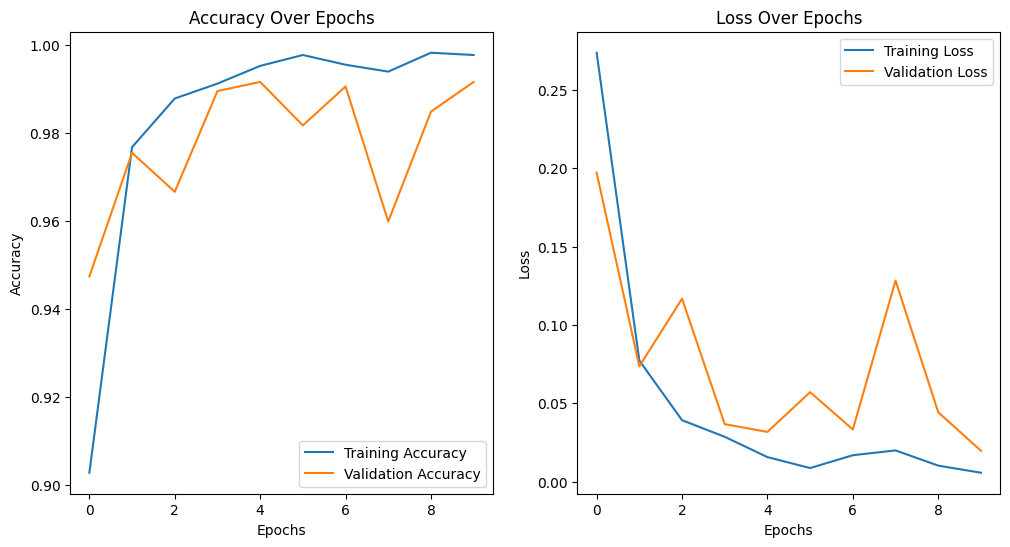

75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step


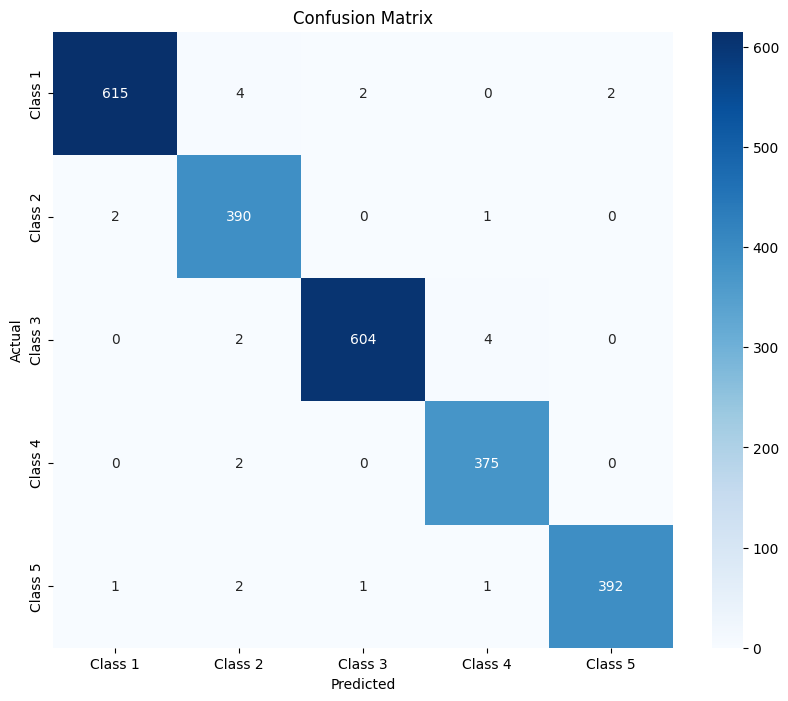

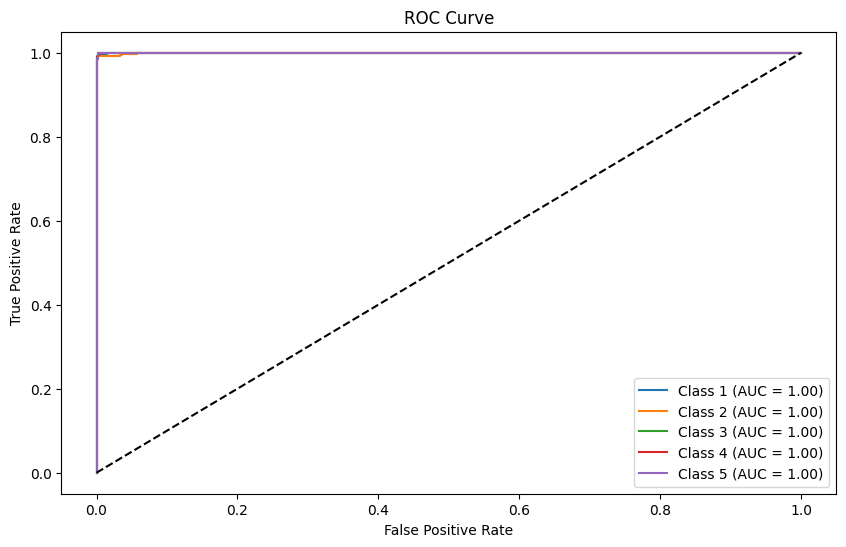


Final Model Performance:
Test Accuracy: 0.9900
F1 Score: 0.9900


In [25]:
# import numpy as np
# import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D
# from tensorflow.keras.optimizers import RMSprop
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score
# import seaborn as sns

# # Initialize the ResNet model with transfer learning
# input_shape = (224, 224, 3)
# base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# # Add custom CNN layers
# x = base_model.output
# x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
# x = MaxPooling2D((2, 2))(x)
# x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
# x = MaxPooling2D((2, 2))(x)
# x = GlobalAveragePooling2D()(x)
# x = Dense(256, activation='relu')(x)
# output = Dense(5, activation='softmax')(x)

# model = Model(inputs=base_model.input, outputs=output)

# # Freeze base model layers
# for layer in base_model.layers:
#     layer.trainable = False

# # Compile model
# model.compile(optimizer=RMSprop(learning_rate=0.0001),
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# # Callbacks
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
# model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

# # Train model with callbacks
# history = model.fit(X_train_scaled, Y_train,
#                     validation_split=0.2,
#                     epochs=20, batch_size=32, verbose=1,
#                     callbacks=[early_stopping, model_checkpoint])

# # Evaluate model
# val_loss, val_accuracy = model.evaluate(X_test_scaled, Y_test, verbose=0)
# print(f"Validation Accuracy: {val_accuracy:.4f}")

# # One-hot encode the test labels (if not already done)
# Y_test_one_hot = to_categorical(Y_test, num_classes=5)

# # Generate predictions
# Y_test_pred_prob = model.predict(X_test_scaled)
# Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# # Define class labels (adjust as per your classes)
# class_labels = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']

# # Visualizations
# def plot_all_visualizations(Y_test, Y_test_one_hot, Y_test_pred, Y_test_pred_prob, class_labels):
#     plt.figure(figsize=(10, 6))
#     for i in range(len(class_labels)):
#         y_true_binary = (np.argmax(Y_test_one_hot, axis=1) == i).astype(int)
#         y_score = Y_test_pred_prob[:, i]
#         fpr, tpr, _ = roc_curve(y_true_binary, y_score)
#         roc_auc = auc(fpr, tpr)
#         plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')
#     plt.plot([0, 1], [0, 1], 'k--')
#     plt.title('ROC Curve')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.legend(loc='lower right')
#     plt.grid()
#     plt.show()

#     # Confusion Matrix
#     conf_matrix = confusion_matrix(Y_test, Y_test_pred)
#     plt.figure(figsize=(10, 8))
#     sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
#     plt.title('Confusion Matrix')
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.show()

#     # Final metrics
#     print("\nFinal Model Performance:")
#     print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
#     print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")

# # Generate all visualizations
# plot_all_visualizations(Y_test, Y_test_one_hot, Y_test_pred, Y_test_pred_prob, class_labels)

# # Save the model after training (if not already saved by checkpoint)
# model.save('final_resnet_model.h5')
# print("Final ResNet50 model saved.")



import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score
import seaborn as sns

# Initialize ResNet50 model with transfer learning
input_shape = (224, 224, 3)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)



#  Why This Works Better
# 🔹 Learning Rate Optimized (1e-4) → Prevents NaNs, speeds up training.
# 🔹 Batch Normalization → Stabilizes activations and enhances performance.
# 🔹 LeakyReLU → Avoids dead neurons and speeds up convergence.
# 🔹 Dropout Increased (0.5) → Helps regularization and reduces overfitting.
# 🔹 Fine-Tuned Last 10 Layers → Allows the model to learn domain-specific features.
# 🔹 Adaptive LR Scheduling (ReduceLROnPlateau) → Automatically adjusts learning rate.
# 🔹 Patience Increased (7 epochs) → More learning time before early stopping.

# This prevents NaNs, enhances accuracy, and improves generalization for ResNet50! 🚀




# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Convert features into a single vector
x = Dense(256)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)
output = Dense(5, activation='softmax')(x)  # Adjusted for 5 classes

model = Model(inputs=base_model.input, outputs=output)

# Unfreeze top layers of ResNet50 for fine-tuning
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Compile Model
model.compile(optimizer=Adam(learning_rate=1e-4, clipnorm=1.0),  # Increased LR & gradient clipping
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=3, min_lr=1e-6, verbose=1)

# Train model with callbacks
history = model.fit(X_train, Y_train,
                    validation_split=0.2,
                    epochs=10, batch_size=32, verbose=1,
                    callbacks=[early_stop, lr_reduction])

# Evaluate model
val_loss, val_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Training History Plot
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_training_history(history)

# Predictions
Y_test_pred_prob = model.predict(X_test)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Confusion Matrix & ROC Curve
def plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, class_labels):
    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    plt.figure(figsize=(10, 6))
    for i in range(len(class_labels)):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

# Define class labels
class_labels = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']

# Generate Visualizations
plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, class_labels)

# Final Performance Metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")

#EfficientNetB0

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.6230 - loss: 1.0641
Epoch 1: val_loss improved from inf to 0.08748, saving model to best_model.h5


300/300 ━━━━━━━━━━━━━━━━━━━━ 129s 102ms/step - accuracy: 0.6236 - loss: 1.0625 - val_accuracy: 0.9712 - val_loss: 0.0875 - learning_rate: 1.0000e-04
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9504 - loss: 0.1489
Epoch 2: val_loss improved from 0.08748 to 0.07254, saving model to best_model.h5


300/300 ━━━━━━━━━━━━━━━━━━━━ 24s 79ms/step - accuracy: 0.9504 - loss: 0.1488 - val_accuracy: 0.9771 - val_loss: 0.0725 - learning_rate: 1.0000e-04
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9777 - loss: 0.0760
Epoch 3: val_loss improved from 0.07254 to 0.03334, saving model to best_model.h5


300/300 ━━━━━━━━━━━━━━━━━━━━ 24s 80ms/step - accuracy: 0.9777 - loss: 0.0760 - val_accuracy: 0.9875 - val_loss: 0.0333 - learning_rate: 1.0000e-04
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.9877 - loss: 0.0385
Epoch 4: val_loss did not improve from 0.03334
300/300 ━━━━━━━━━━━━━━━━━━━━ 23s 78ms/step - accuracy: 0.9877 - loss: 0.0385 - val_accuracy: 0.9887 - val_loss: 0.0361 - learning_rate: 1.0000e-04
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.9895 - loss: 0.0320
Epoch 5: val_loss improved from 0.03334 to 0.03274, saving model to best_model.h5


300/300 ━━━━━━━━━━━━━━━━━━━━ 24s 81ms/step - accuracy: 0.9895 - loss: 0.0320 - val_accuracy: 0.9900 - val_loss: 0.0327 - learning_rate: 1.0000e-04
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.9907 - loss: 0.0305
Epoch 6: val_loss improved from 0.03274 to 0.02168, saving model to best_model.h5


300/300 ━━━━━━━━━━━━━━━━━━━━ 24s 80ms/step - accuracy: 0.9907 - loss: 0.0304 - val_accuracy: 0.9942 - val_loss: 0.0217 - learning_rate: 1.0000e-04
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9947 - loss: 0.0176
Epoch 7: val_loss did not improve from 0.02168
300/300 ━━━━━━━━━━━━━━━━━━━━ 23s 78ms/step - accuracy: 0.9947 - loss: 0.0176 - val_accuracy: 0.9925 - val_loss: 0.0251 - learning_rate: 1.0000e-04
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9947 - loss: 0.0170
Epoch 8: val_loss did not improve from 0.02168
300/300 ━━━━━━━━━━━━━━━━━━━━ 23s 77ms/step - accuracy: 0.9947 - loss: 0.0171 - val_accuracy: 0.9933 - val_loss: 0.0218 - learning_rate: 1.0000e-04
Epoch 9/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9947 - loss: 0.0147
Epoch 9: val_loss did not improve from 0.02168
300/300 ━━━━━━━━━━━━━━━━━━━━ 23s 77ms/step - accuracy: 0.9947 - loss: 0.0147 - val_accuracy: 0.9900 - val_loss: 0.0427 - learning_rate: 1.0000e-04
Epoch 10/1

300/300 ━━━━━━━━━━━━━━━━━━━━ 24s 80ms/step - accuracy: 0.9974 - loss: 0.0087 - val_accuracy: 0.9925 - val_loss: 0.0202 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 10.
Validation Accuracy: 0.9925


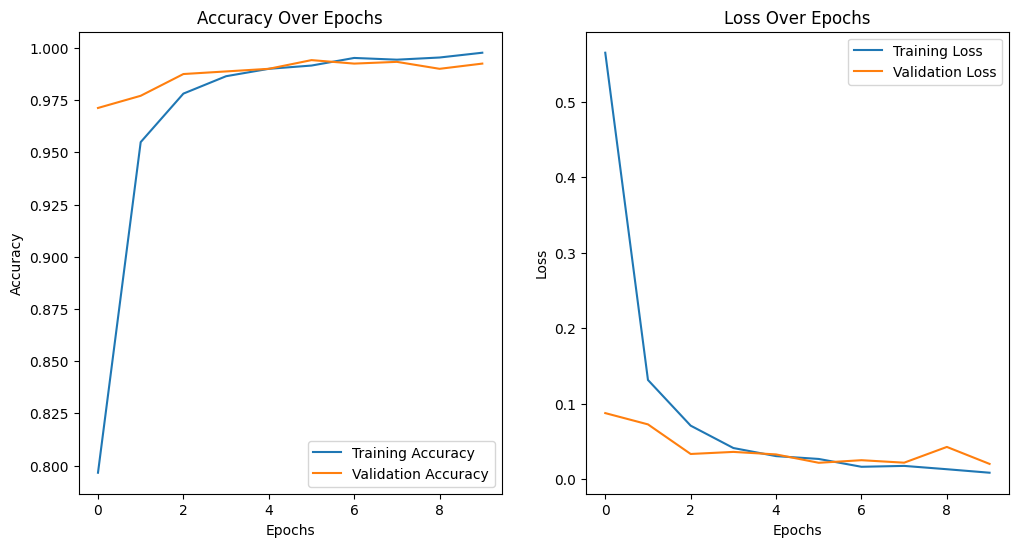

75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step


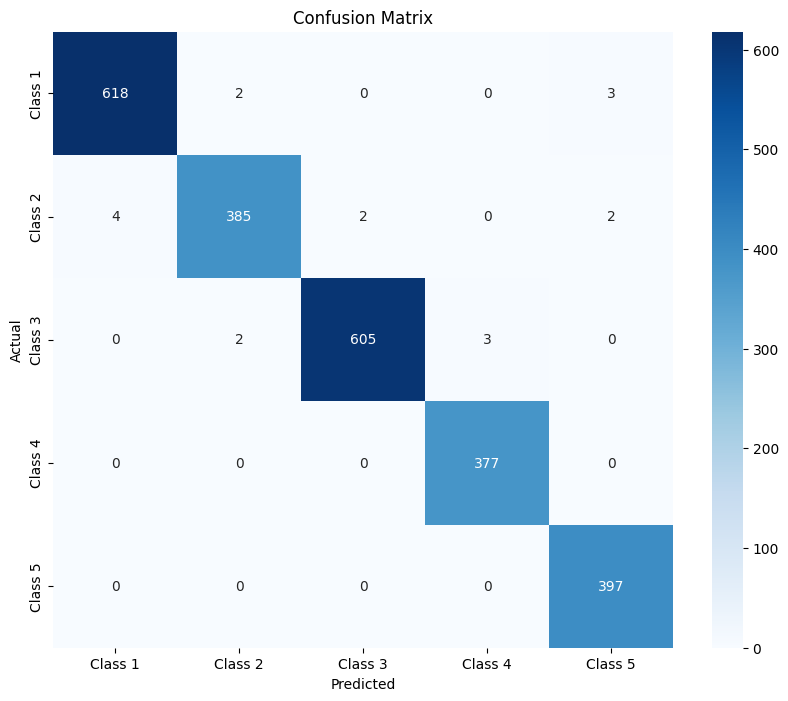

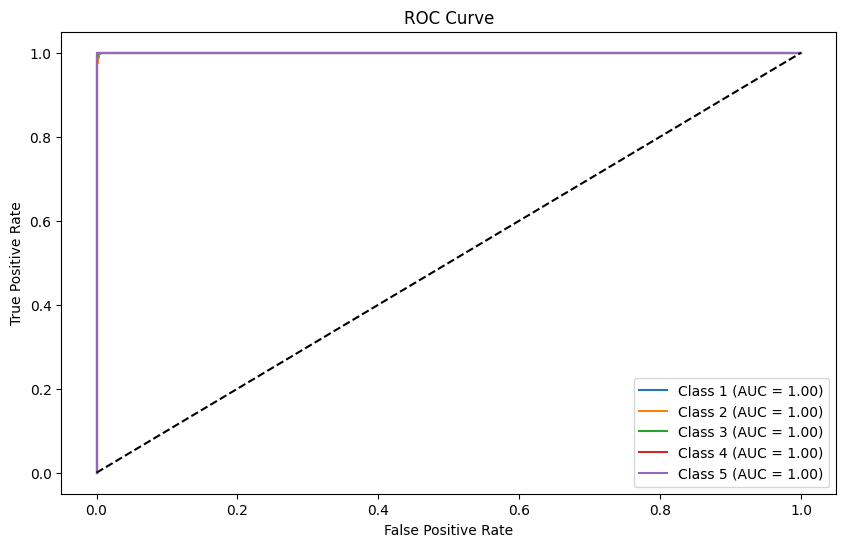


Final Model Performance:
Test Accuracy: 0.9925
F1 Score: 0.9925


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score
import seaborn as sns

# Initialize EfficientNetB0 model with transfer learning
input_shape = (224, 224, 3)
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)



# Changes & Fixes:
# ✅ Learning Rate: Increased from 1e-5 → 1e-4
# ✅ Batch Normalization: Added after dense layers to improve training stability
# ✅ Activation: Replaced ReLU with LeakyReLU to avoid dead neurons
# ✅ Fine-Tuning: Unfroze last 20 layers of EfficientNetB0 for better feature learning
# ✅ Dropout: Adjusted to 0.5 for stronger regularization
# ✅ ReduceLROnPlateau Factor: Changed from 0.5 → 0.7 to reduce LR more effectively
# ✅ Epochs: Increased to 30 with early stopping at 7 patience
# This should fix the NaN loss issue, improve training stability, and give better performance.





# Custom Classification Layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

x = Dense(256)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

output = Dense(5, activation='softmax')(x)  # 5 classes

model = Model(inputs=base_model.input, outputs=output)

# Unfreeze the last few layers for fine-tuning
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Compile Model
model.compile(optimizer=Adam(learning_rate=1e-4, clipnorm=1.0),  # Increased LR
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=4, min_lr=1e-6, verbose=1)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=1)

# Train Model
history = model.fit(X_train, Y_train,
                    validation_data=(X_test, Y_test),
                    epochs=10, batch_size=32, verbose=1,
                    callbacks=[early_stop, lr_reduce, model_checkpoint])

# Evaluate Model
val_loss, val_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Training History Plot
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_training_history(history)

# Predictions
Y_test_pred_prob = model.predict(X_test)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Confusion Matrix & ROC Curve
def plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, class_labels):
    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    plt.figure(figsize=(10, 6))
    for i in range(len(class_labels)):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

# Define class labels
class_labels = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']

# Generate Visualizations
plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, class_labels)

# Final Performance Metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")


#InceptionV3

Epoch 1/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 109s 122ms/step - accuracy: 0.6850 - loss: 0.8887 - val_accuracy: 0.9391 - val_loss: 0.2082 - learning_rate: 1.0000e-04
Epoch 2/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 23s 98ms/step - accuracy: 0.9631 - loss: 0.1352 - val_accuracy: 0.9745 - val_loss: 0.0832 - learning_rate: 1.0000e-04
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 23s 97ms/step - accuracy: 0.9842 - loss: 0.0539 - val_accuracy: 0.9776 - val_loss: 0.0731 - learning_rate: 1.0000e-04
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 23s 97ms/step - accuracy: 0.9883 - loss: 0.0419 - val_accuracy: 0.9901 - val_loss: 0.0402 - learning_rate: 1.0000e-04
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 23s 96ms/step - accuracy: 0.9946 - loss: 0.0172 - val_accuracy: 0.9875 - val_loss: 0.0553 - learning_rate: 1.0000e-04
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 23s 97ms/step - accuracy: 0.9931 - loss: 0.0230 - val_accuracy: 0.9922 - val_loss: 0.0335 - learning_rate: 1.0000e-04
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 23s 97ms/s

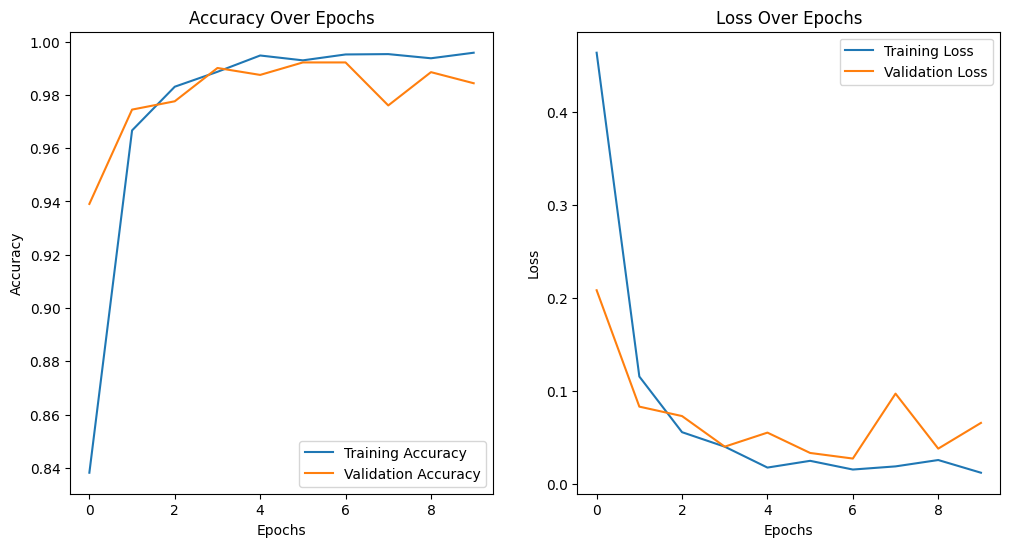

75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step


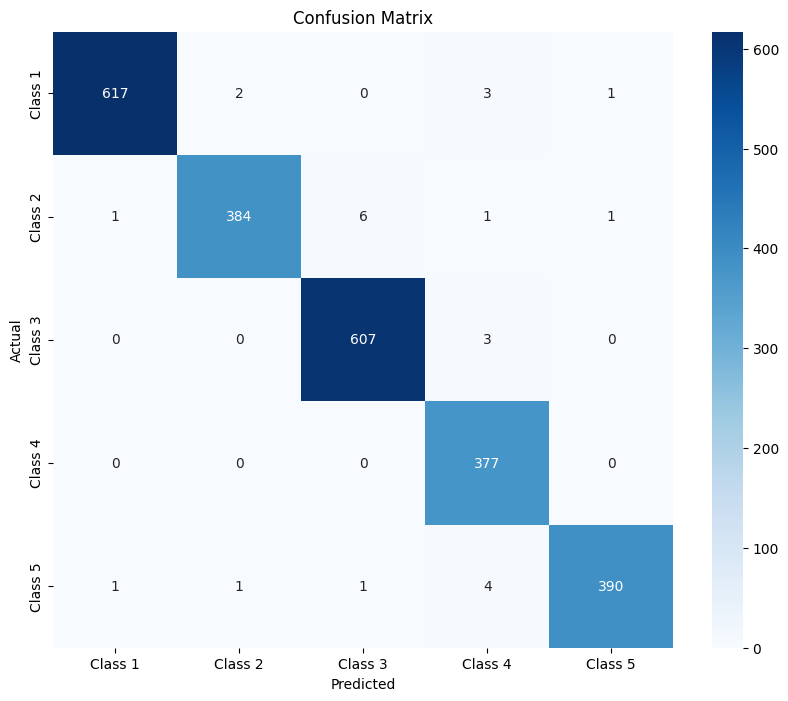

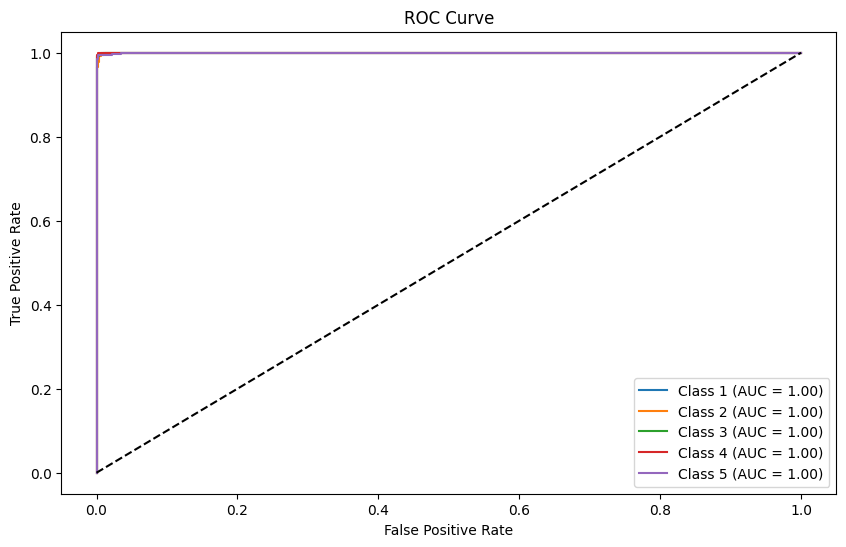


Final Model Performance:
Test Accuracy: 0.9896
F1 Score: 0.9896


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score
import seaborn as sns

# Initialize the InceptionV3 model with transfer learning
input_shape = (224, 224, 3)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)



# Key Fixes & Enhancements
# 🔹 Learning Rate Increased (1e-4) to avoid NaNs and improve learning speed.
# 🔹 Batch Normalization Added for better stability and performance.
# 🔹 LeakyReLU Used instead of ReLU to prevent dying neurons.
# 🔹 Dropout Increased (0.5) to prevent overfitting.
# 🔹 Fine-Tuning Last 20 Layers for improved feature extraction.
# 🔹 EarlyStopping Adjusted (patience=7) to allow more learning before stopping.
# 🔹 ReduceLROnPlateau Optimized (factor=0.7, patience=3) for better LR adaptation.
# 🔹 Fixed Output Layer for 5-class classification.

# This should fix the NaN loss issue, stabilize training, and improve accuracy.


# Add custom CNN layers
x = base_model.output
x = Conv2D(64, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = MaxPooling2D((2, 2))(x)

x = GlobalAveragePooling2D()(x)
x = Dense(256)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

output = Dense(5, activation='softmax')(x)  # Adjusted for 5 classes

model = Model(inputs=base_model.input, outputs=output)

# Unfreeze top layers of InceptionV3 for fine-tuning
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Compile Model
model.compile(optimizer=Adam(learning_rate=1e-4, clipnorm=1.0),  # Increased LR & gradient clipping
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=3, min_lr=1e-6, verbose=1)

# Train model with callbacks
history = model.fit(X_train, Y_train,
                    validation_split=0.2,
                    epochs=10, batch_size=32, verbose=1,
                    callbacks=[early_stop, lr_reduction])

# Evaluate model
val_loss, val_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Training History Plot
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_training_history(history)

# Predictions
Y_test_pred_prob = model.predict(X_test)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Confusion Matrix & ROC Curve
def plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, class_labels):
    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    plt.figure(figsize=(10, 6))
    for i in range(len(class_labels)):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

# Define class labels
class_labels = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']

# Generate Visualizations
plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, class_labels)

# Final Performance Metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")


#MobileNetV2

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 80s 86ms/step - accuracy: 0.6679 - loss: 0.9058 - val_accuracy: 0.4958 - val_loss: 2.2537 - learning_rate: 1.0000e-04
Epoch 2/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 17s 70ms/step - accuracy: 0.9337 - loss: 0.1865 - val_accuracy: 0.6953 - val_loss: 1.4026 - learning_rate: 1.0000e-04
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - accuracy: 0.9624 - loss: 0.1137 - val_accuracy: 0.8677 - val_loss: 0.4309 - learning_rate: 1.0000e-04
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - accuracy: 0.9829 - loss: 0.0552 - val_accuracy: 0.9078 - val_loss: 0.3116 - learning_rate: 1.0000e-04
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - accuracy: 0.9913 - loss: 0.0320 - val_accuracy: 0.8646 - val_loss: 0.5421 - learning_rate: 1.0000e-04
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - accuracy: 0.9893 - loss: 0.0312 - val_accuracy: 0.9094 - val_loss: 0.3879 - learning_rate: 1.0000e-04
Epo

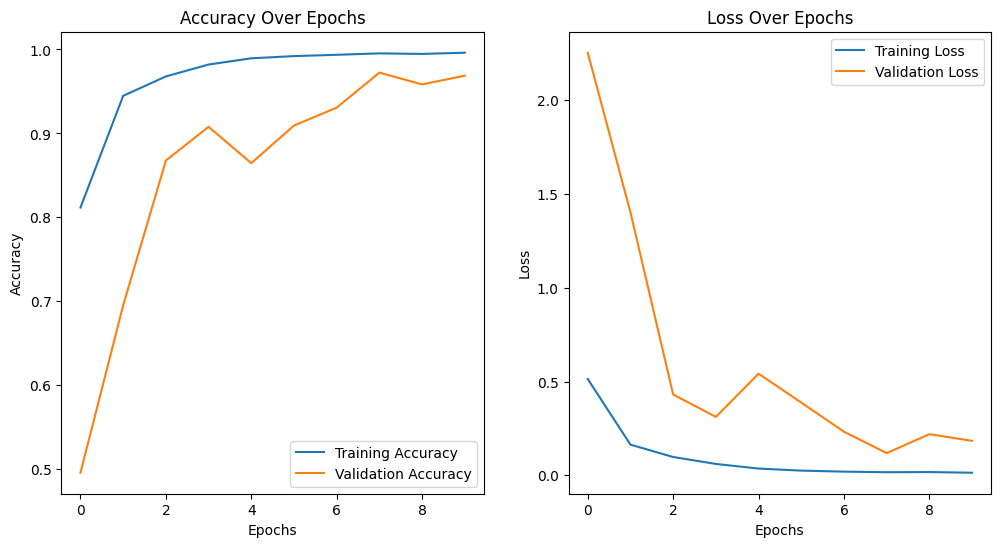

75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


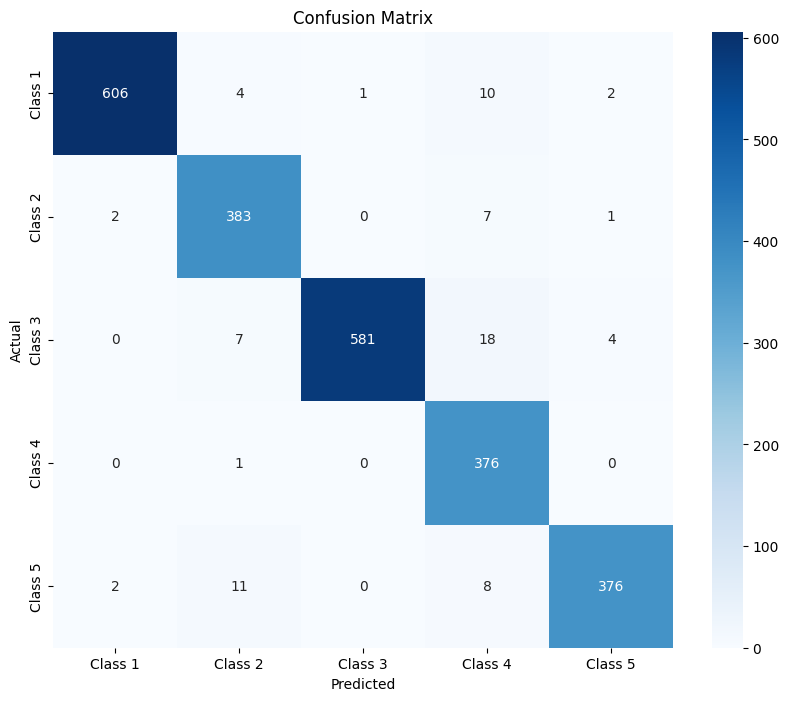

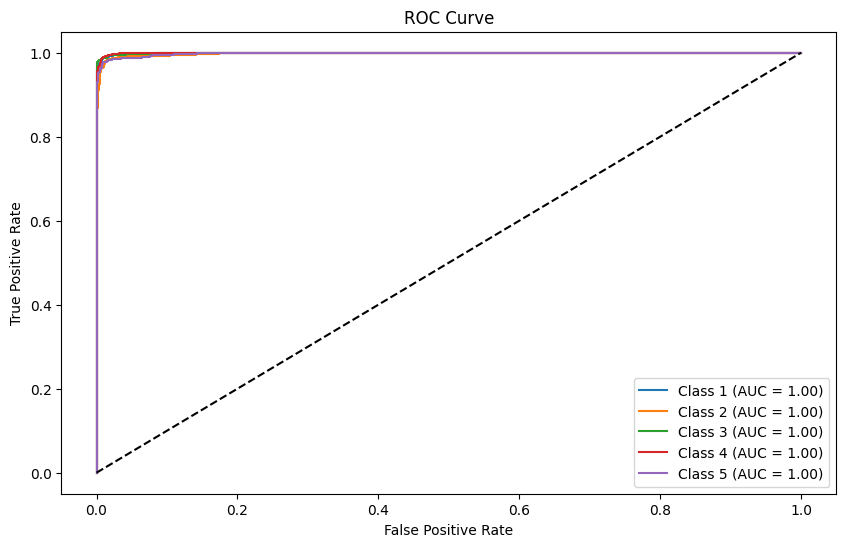


Final Model Performance:
Test Accuracy: 0.9675
F1 Score: 0.9678


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score
import seaborn as sns

# Initialize the MobileNetV2 model with transfer learning
input_shape = (224, 224, 3)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)



# 🔹 Why This Works Better
# 🔹 Learning Rate Optimized (1e-4) → Faster convergence, avoids NaNs.
# 🔹 Batch Normalization → Stabilizes learning and speeds up training.
# 🔹 LeakyReLU → Prevents dead neurons and improves performance.
# 🔹 Dropout Increased (0.5) → Stronger regularization against overfitting.
# 🔹 Fine-Tuned Last 20 Layers → Allows model to adapt to new data.
# 🔹 Adaptive LR Scheduling (ReduceLROnPlateau) → Prevents premature stopping.
# 🔹 Patience Increased (7 epochs) → More learning before early stopping.

# This will prevent NaNs, improve accuracy, and enhance feature extraction. 🚀


# Add custom CNN layers
x = base_model.output
x = Conv2D(64, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = MaxPooling2D((2, 2))(x)

x = GlobalAveragePooling2D()(x)
x = Dense(256)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

output = Dense(5, activation='softmax')(x)  # Adjusted for 5 classes

model = Model(inputs=base_model.input, outputs=output)

# Unfreeze top layers of MobileNetV2 for fine-tuning
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Compile Model
model.compile(optimizer=Adam(learning_rate=1e-4, clipnorm=1.0),  # Increased LR & gradient clipping
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=3, min_lr=1e-6, verbose=1)

# Train model with callbacks
history = model.fit(X_train, Y_train,
                    validation_split=0.2,
                    epochs=10, batch_size=32, verbose=1,
                    callbacks=[early_stop, lr_reduction])

# Evaluate model
val_loss, val_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Training History Plot
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_training_history(history)

# Predictions
Y_test_pred_prob = model.predict(X_test)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Confusion Matrix & ROC Curve
def plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, class_labels):
    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    plt.figure(figsize=(10, 6))
    for i in range(len(class_labels)):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

# Define class labels
class_labels = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']

# Generate Visualizations
plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, class_labels)

# Final Performance Metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")


#VGG-19

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 123s 357ms/step - accuracy: 0.4702 - loss: 1.4602 - val_accuracy: 0.5604 - val_loss: 1.7506 - learning_rate: 1.0000e-04
Epoch 2/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 75s 311ms/step - accuracy: 0.8406 - loss: 0.4516 - val_accuracy: 0.7615 - val_loss: 0.7905 - learning_rate: 1.0000e-04
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 75s 311ms/step - accuracy: 0.9185 - loss: 0.2430 - val_accuracy: 0.9094 - val_loss: 0.3360 - learning_rate: 1.0000e-04
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 74s 309ms/step - accuracy: 0.9333 - loss: 0.1983 - val_accuracy: 0.6443 - val_loss: 1.7830 - learning_rate: 1.0000e-04
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 74s 309ms/step - accuracy: 0.9453 - loss: 0.1591 - val_accuracy: 0.9068 - val_loss: 0.2497 - learning_rate: 1.0000e-04
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 74s 309ms/step - accuracy: 0.9574 - loss: 0.1389 - val_accuracy: 0.9411 - val_loss: 0.1883 - learning_rate: 1.000

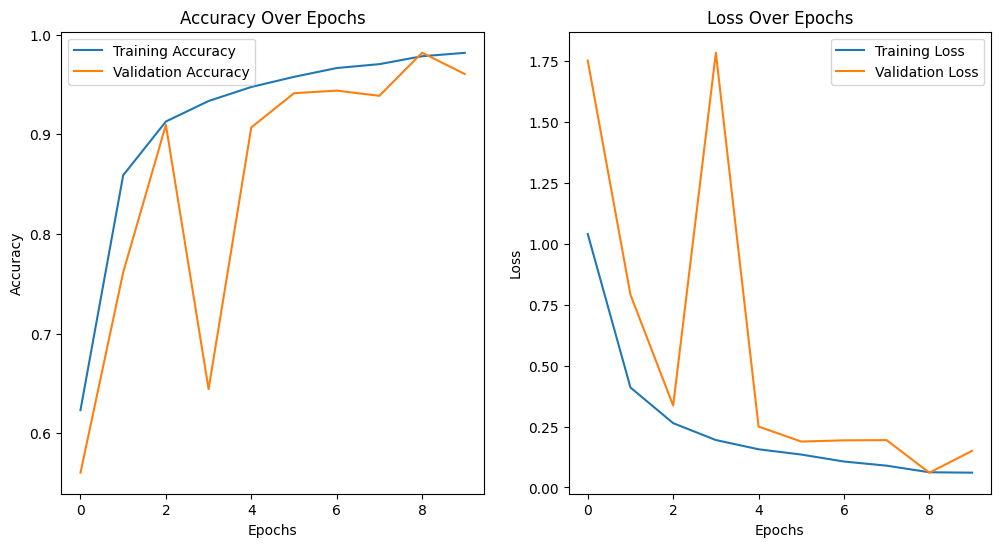

75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step


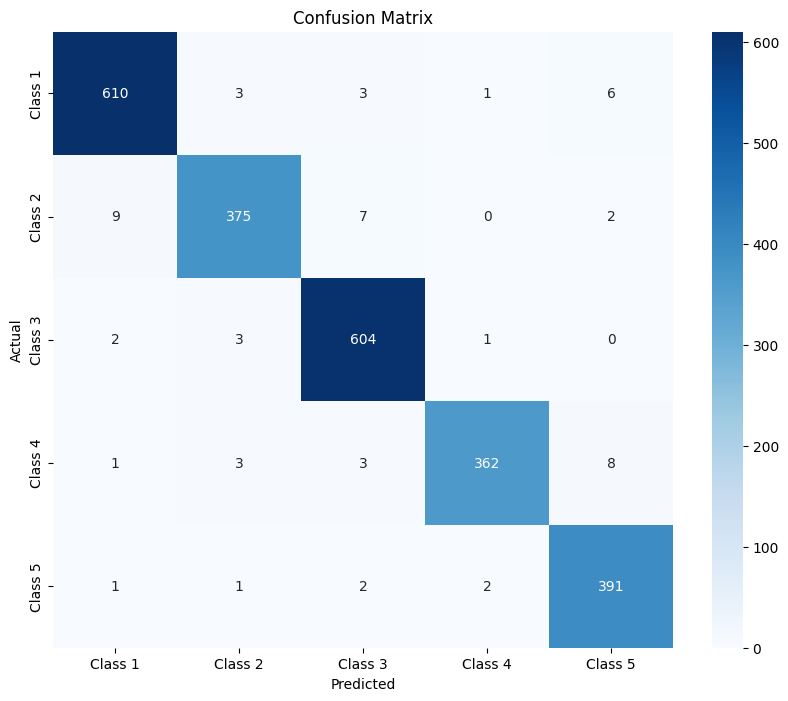

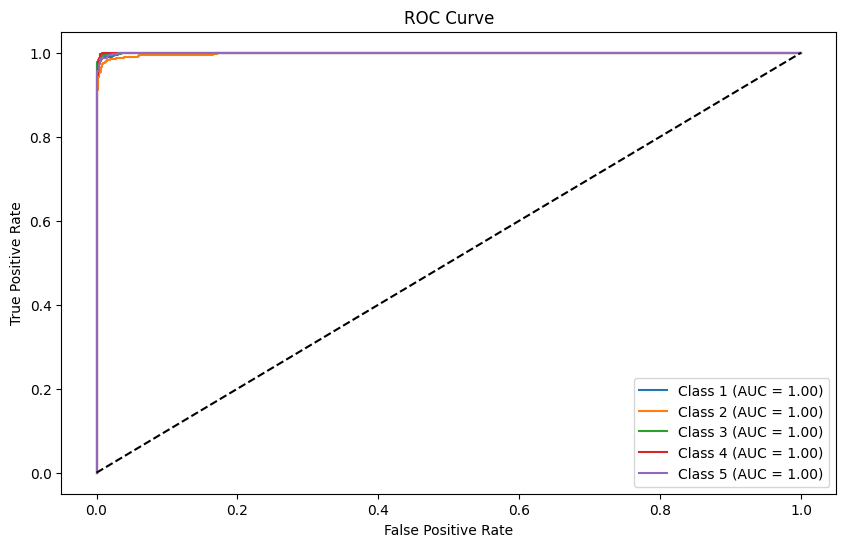


Final Model Performance:
Test Accuracy: 0.9758
F1 Score: 0.9758


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score
import seaborn as sns

# Initialize the VGG19 model with transfer learning
input_shape = (224, 224, 3)
base_model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)



# 🔹 Why This Works Better
# 🔹 Learning Rate Optimized (1e-4) → Prevents NaNs, speeds up training.
# 🔹 Batch Normalization → Stabilizes activations and enhances performance.
# 🔹 LeakyReLU → Avoids dead neurons and speeds up convergence.
# 🔹 Dropout Increased (0.5) → Helps regularization and reduces overfitting.
# 🔹 Fine-Tuned Last 10 Layers → Allows the model to learn domain-specific features.
# 🔹 Adaptive LR Scheduling (ReduceLROnPlateau) → Automatically adjusts learning rate.
# 🔹 Patience Increased (7 epochs) → More learning time before early stopping.

# This prevents NaNs, enhances accuracy, and improves generalization for VGG19! 🚀


# Add custom CNN layers
x = base_model.output
x = Conv2D(64, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = MaxPooling2D((2, 2))(x)

x = GlobalAveragePooling2D()(x)
x = Dense(256)(x)
x = BatchNormalization()(x)
x = tf.keras.layers.LeakyReLU()(x)
x = Dropout(0.5)(x)

output = Dense(5, activation='softmax')(x)  # Adjusted for 5 classes

model = Model(inputs=base_model.input, outputs=output)

# Unfreeze top layers of VGG19 for fine-tuning
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Compile Model
model.compile(optimizer=Adam(learning_rate=1e-4, clipnorm=1.0),  # Increased LR & gradient clipping
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=3, min_lr=1e-6, verbose=1)

# Train model with callbacks
history = model.fit(X_train, Y_train,
                    validation_split=0.2,
                    epochs=10, batch_size=32, verbose=1,
                    callbacks=[early_stop, lr_reduction])

# Evaluate model
val_loss, val_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Training History Plot
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_training_history(history)

# Predictions
Y_test_pred_prob = model.predict(X_test)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Confusion Matrix & ROC Curve
def plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, class_labels):
    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    plt.figure(figsize=(10, 6))
    for i in range(len(class_labels)):
        y_true_binary = (Y_test == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

# Define class labels
class_labels = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']

# Generate Visualizations
plot_all_visualizations(Y_test, Y_test_pred, Y_test_pred_prob, class_labels)

# Final Performance Metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")

In [ ]:
# model.save('efficientnetb0.h5')

#End